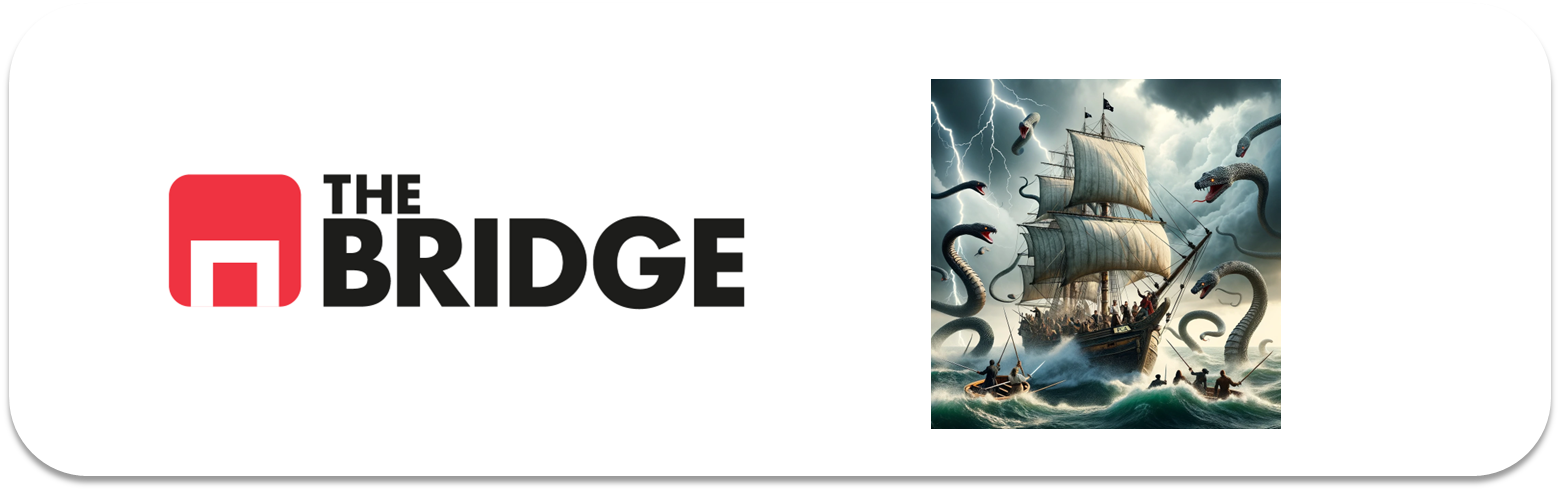

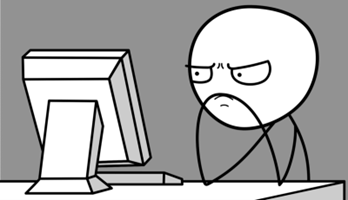

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [59]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [60]:
df_nutri_original=pd.read_csv("./data/nutrition.csv",index_col="ID")
df_nutri_original.index.name=None
df_nutri_original.head()

,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [61]:
df_nutri_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FoodGroup         8618 non-null   object 
 1   ShortDescrip      8618 non-null   object 
 2   Descrip           8618 non-null   object 
 3   CommonName        1063 non-null   object 
 4   MfgName           1560 non-null   object 
 5   ScientificName    732 non-null    object 
 6   Energy_kcal       8618 non-null   float64
 7   Protein_g         8618 non-null   float64
 8   Fat_g             8618 non-null   float64
 9   Carb_g            8618 non-null   float64
 10  Sugar_g           8618 non-null   float64
 11  Fiber_g           8618 non-null   float64
 12  VitA_mcg          8618 non-null   float64
 13  VitB6_mg          8618 non-null   float64
 14  VitB12_mcg        8618 non-null   float64
 15  VitC_mg           8618 non-null   float64
 16  VitE_mg           8618 non-null   float64
 

In [62]:
features_num=['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA']

### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

<Axes: >

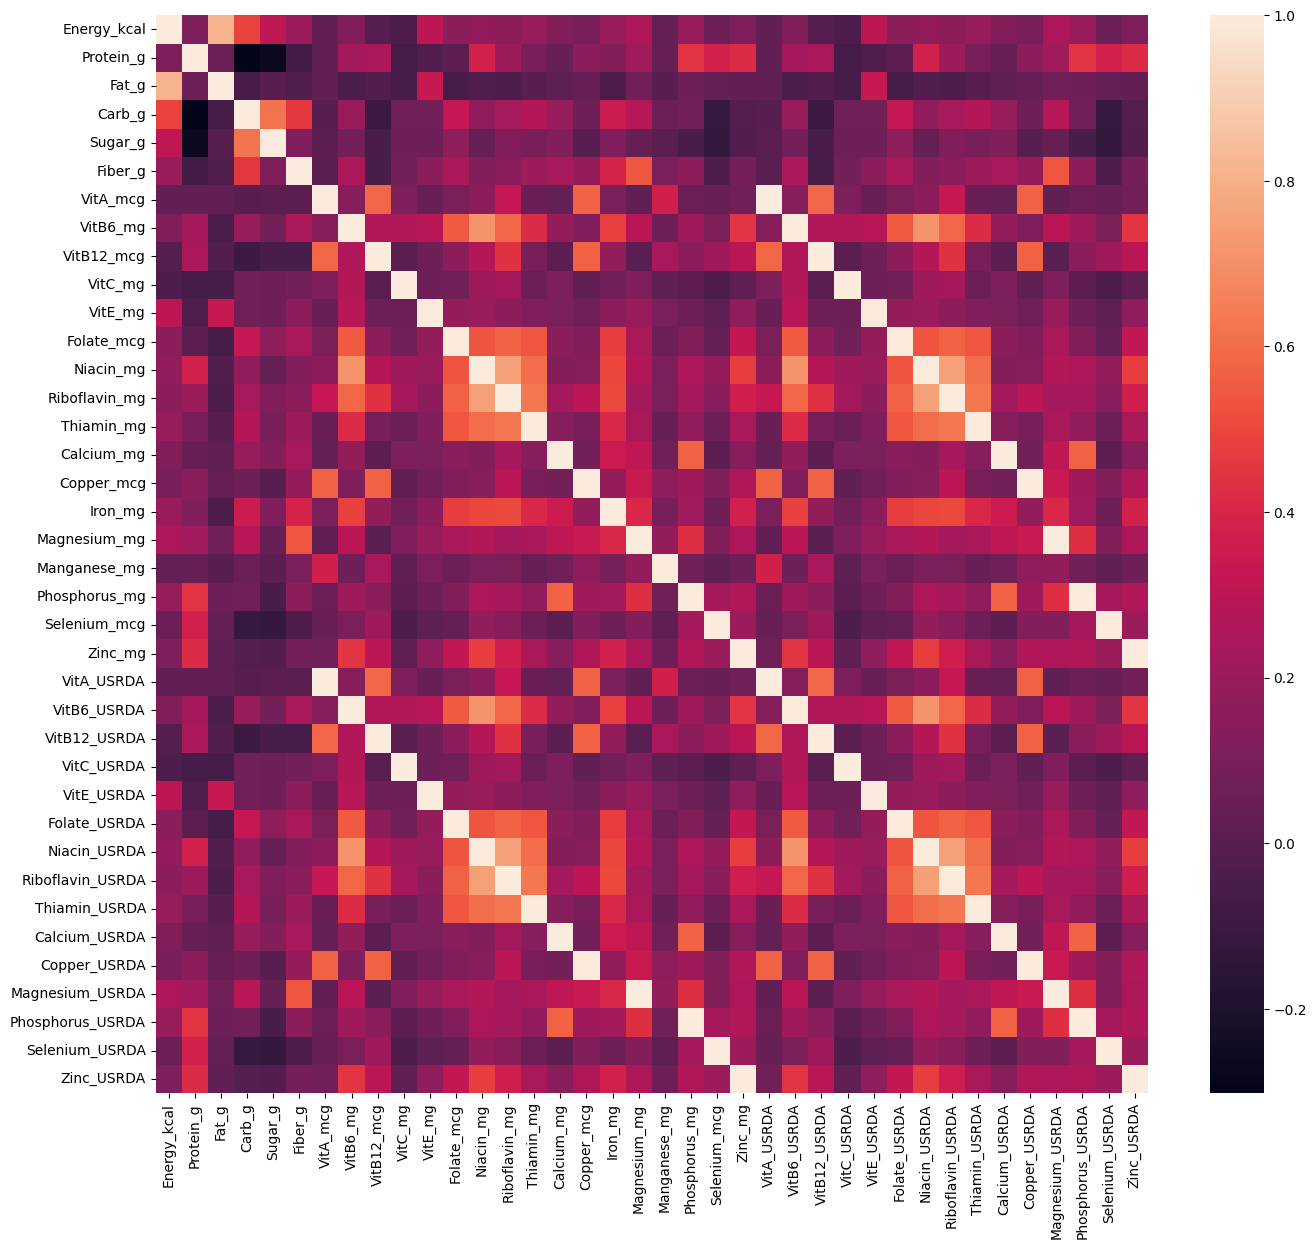

In [63]:
corr=df_nutri_original[features_num].corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr)

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [64]:
#Que tienen una correlacion de 1 con sus columnas relacionadas que no son USRDA, un exceso de correlación total.
# Esto significa que las USRDA aportan la misma informacion que sus relacionadas y por tanto podemos eliminar o unas o otras,
#  vamosa a comprobar el describe() porque las USRDA parecen versiones estandarizadas de las originales.

In [65]:
df_nutri_original[['VitA_USRDA','VitA_mcg']]

,VitA_USRDA,VitA_mcg
1001,0.760000,684.0
1002,0.760000,684.0
1003,0.933333,840.0
1004,0.220000,198.0
1005,0.324444,292.0
...,...,...
83110,0.052222,47.0
90240,0.002222,2.0
90480,0.000000,0.0
90560,0.033333,30.0


In [66]:
df_nutri_original.describe() #Se confirma la teoría, pero vamos a borrar las USRDA y luego estandarizaremos todas a la vez para que tengan una escala similar

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,7.925377,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,57.582758,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,0.000000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,2.500000,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,2400.000000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


In [67]:
df_nutri=df_nutri_original.copy()

In [68]:
df_nutri= df_nutri.drop(columns=['VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'])
df_nutri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FoodGroup       8618 non-null   object 
 1   ShortDescrip    8618 non-null   object 
 2   Descrip         8618 non-null   object 
 3   CommonName      1063 non-null   object 
 4   MfgName         1560 non-null   object 
 5   ScientificName  732 non-null    object 
 6   Energy_kcal     8618 non-null   float64
 7   Protein_g       8618 non-null   float64
 8   Fat_g           8618 non-null   float64
 9   Carb_g          8618 non-null   float64
 10  Sugar_g         8618 non-null   float64
 11  Fiber_g         8618 non-null   float64
 12  VitA_mcg        8618 non-null   float64
 13  VitB6_mg        8618 non-null   float64
 14  VitB12_mcg      8618 non-null   float64
 15  VitC_mg         8618 non-null   float64
 16  VitE_mg         8618 non-null   float64
 17  Folate_mcg      8618 non-null   fl

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [69]:
df_nutri= df_nutri.drop(columns=['FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName'])
df_nutri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesium

### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


array([[<Axes: title={'center': 'Energy_kcal'}>,
        <Axes: title={'center': 'Protein_g'}>,
        <Axes: title={'center': 'Fat_g'}>,
        <Axes: title={'center': 'Carb_g'}>,
        <Axes: title={'center': 'Sugar_g'}>],
       [<Axes: title={'center': 'Fiber_g'}>,
        <Axes: title={'center': 'VitA_mcg'}>,
        <Axes: title={'center': 'VitB6_mg'}>,
        <Axes: title={'center': 'VitB12_mcg'}>,
        <Axes: title={'center': 'VitC_mg'}>],
       [<Axes: title={'center': 'VitE_mg'}>,
        <Axes: title={'center': 'Folate_mcg'}>,
        <Axes: title={'center': 'Niacin_mg'}>,
        <Axes: title={'center': 'Riboflavin_mg'}>,
        <Axes: title={'center': 'Thiamin_mg'}>],
       [<Axes: title={'center': 'Calcium_mg'}>,
        <Axes: title={'center': 'Copper_mcg'}>,
        <Axes: title={'center': 'Iron_mg'}>,
        <Axes: title={'center': 'Magnesium_mg'}>,
        <Axes: title={'center': 'Manganese_mg'}>],
       [<Axes: title={'center': 'Phosphorus_mg'}>,
       

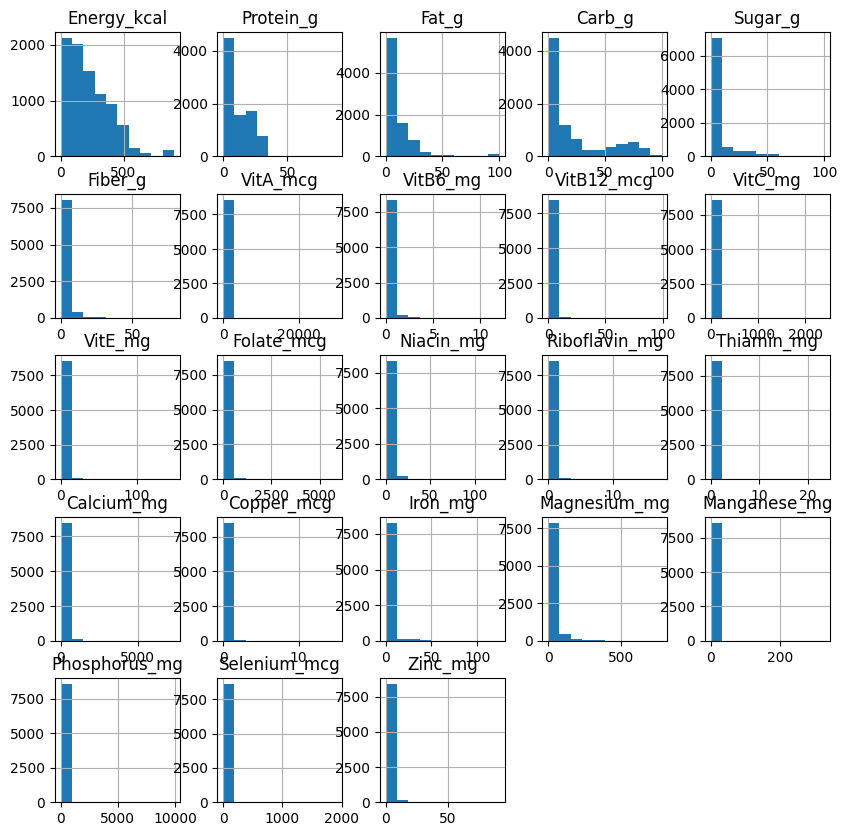

In [70]:
df_nutri.hist(figsize=(10,10)) #Todas necesitan logaritmizarse, despues las estandarizaremos con standar scaler

In [71]:
df_nutri=df_nutri.apply(np.log1p)

array([[<Axes: title={'center': 'Energy_kcal'}>,
        <Axes: title={'center': 'Protein_g'}>,
        <Axes: title={'center': 'Fat_g'}>,
        <Axes: title={'center': 'Carb_g'}>,
        <Axes: title={'center': 'Sugar_g'}>],
       [<Axes: title={'center': 'Fiber_g'}>,
        <Axes: title={'center': 'VitA_mcg'}>,
        <Axes: title={'center': 'VitB6_mg'}>,
        <Axes: title={'center': 'VitB12_mcg'}>,
        <Axes: title={'center': 'VitC_mg'}>],
       [<Axes: title={'center': 'VitE_mg'}>,
        <Axes: title={'center': 'Folate_mcg'}>,
        <Axes: title={'center': 'Niacin_mg'}>,
        <Axes: title={'center': 'Riboflavin_mg'}>,
        <Axes: title={'center': 'Thiamin_mg'}>],
       [<Axes: title={'center': 'Calcium_mg'}>,
        <Axes: title={'center': 'Copper_mcg'}>,
        <Axes: title={'center': 'Iron_mg'}>,
        <Axes: title={'center': 'Magnesium_mg'}>,
        <Axes: title={'center': 'Manganese_mg'}>],
       [<Axes: title={'center': 'Phosphorus_mg'}>,
       

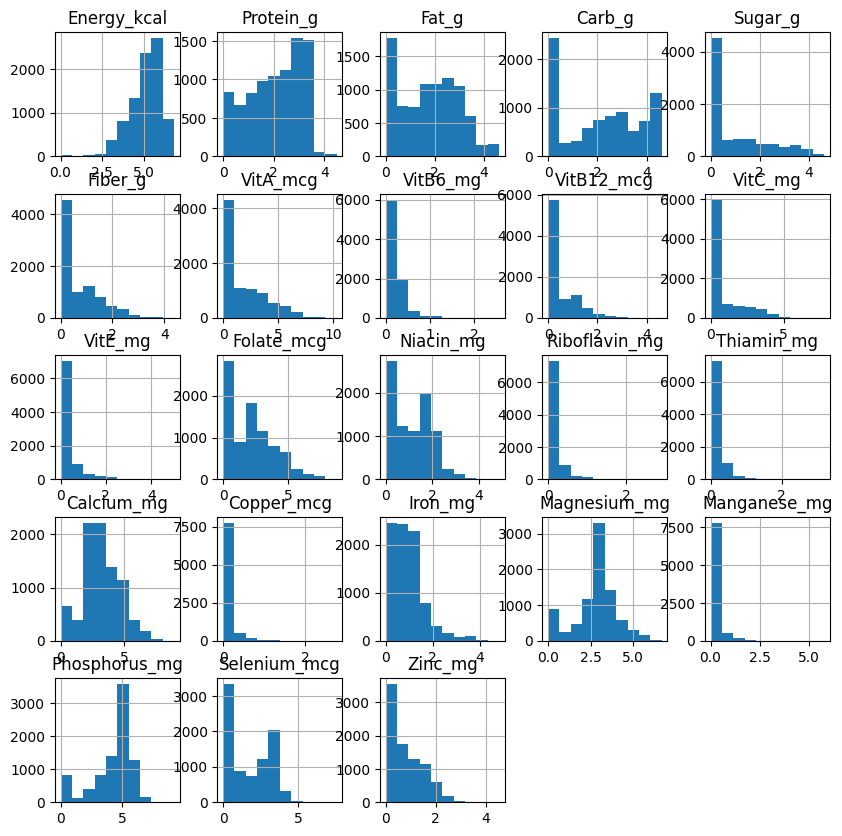

In [72]:
df_nutri.hist(figsize=(10,10))

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [73]:
scaler=StandardScaler()

df_nutri[df_nutri.columns.to_list()]=scaler.fit_transform(df_nutri)

In [74]:
df_nutri.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,...,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03,8.618000e+03
mean,-2.160155e-16,1.945789e-16,9.069355e-17,2.473460e-16,-1.286199e-16,-1.813871e-17,1.022364e-16,6.430997e-17,-5.111818e-17,4.122434e-17,...,1.071833e-16,-7.255484e-17,5.936305e-17,-1.603627e-16,-6.595895e-17,5.194267e-17,8.244868e-18,-4.452229e-17,-1.401628e-16,5.441613e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,...,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-5.207330e+00,-1.961806e+00,-1.510128e+00,-1.315522e+00,-7.969631e-01,-8.178178e-01,-8.309744e-01,-8.238454e-01,-6.936126e-01,-6.350195e-01,...,-8.399996e-01,-7.050583e-01,-2.092453e+00,-6.242369e-01,-1.318770e+00,-2.173767e+00,-4.782942e-01,-2.480348e+00,-1.184060e+00,-1.150447e+00
25%,-5.457117e-01,-7.845487e-01,-9.263689e-01,-1.291167e+00,-7.969631e-01,-8.178178e-01,-8.309744e-01,-6.835452e-01,-6.936126e-01,-6.350195e-01,...,-6.323408e-01,-5.719706e-01,-5.645306e-01,-4.784691e-01,-7.217313e-01,-3.181753e-01,-4.782942e-01,-3.635339e-01,-1.117607e+00,-8.527826e-01
50%,1.870891e-01,1.467749e-01,3.962894e-02,1.108632e-01,-5.506944e-01,-4.976256e-01,-3.927255e-01,-3.517040e-01,-5.760347e-01,-6.350195e-01,...,-1.946664e-01,-3.689783e-01,-1.045803e-01,-2.492755e-01,-1.312444e-01,1.822119e-01,-4.214700e-01,3.698432e-01,-7.599149e-02,-2.697727e-01
75%,7.643284e-01,9.180010e-01,7.773286e-01,8.723726e-01,6.428538e-01,6.756910e-01,6.811104e-01,4.418293e-01,5.772068e-01,3.544323e-01,...,2.271297e-01,2.013203e-01,6.567993e-01,4.242737e-02,4.717289e-01,4.582220e-01,4.522832e-02,6.503660e-01,9.805632e-01,7.307952e-01
max,1.775637e+00,2.288877e+00,2.397860e+00,1.550276e+00,2.811782e+00,4.530055e+00,4.212004e+00,9.862054e+00,6.340292e+00,5.512622e+00,...,1.263244e+01,1.367385e+01,3.816285e+00,1.306404e+01,5.455266e+00,2.981455e+00,1.465655e+01,2.874676e+00,4.086359e+00,5.350618e+00


array([[<Axes: title={'center': 'Energy_kcal'}>,
        <Axes: title={'center': 'Protein_g'}>,
        <Axes: title={'center': 'Fat_g'}>,
        <Axes: title={'center': 'Carb_g'}>,
        <Axes: title={'center': 'Sugar_g'}>],
       [<Axes: title={'center': 'Fiber_g'}>,
        <Axes: title={'center': 'VitA_mcg'}>,
        <Axes: title={'center': 'VitB6_mg'}>,
        <Axes: title={'center': 'VitB12_mcg'}>,
        <Axes: title={'center': 'VitC_mg'}>],
       [<Axes: title={'center': 'VitE_mg'}>,
        <Axes: title={'center': 'Folate_mcg'}>,
        <Axes: title={'center': 'Niacin_mg'}>,
        <Axes: title={'center': 'Riboflavin_mg'}>,
        <Axes: title={'center': 'Thiamin_mg'}>],
       [<Axes: title={'center': 'Calcium_mg'}>,
        <Axes: title={'center': 'Copper_mcg'}>,
        <Axes: title={'center': 'Iron_mg'}>,
        <Axes: title={'center': 'Magnesium_mg'}>,
        <Axes: title={'center': 'Manganese_mg'}>],
       [<Axes: title={'center': 'Phosphorus_mg'}>,
       

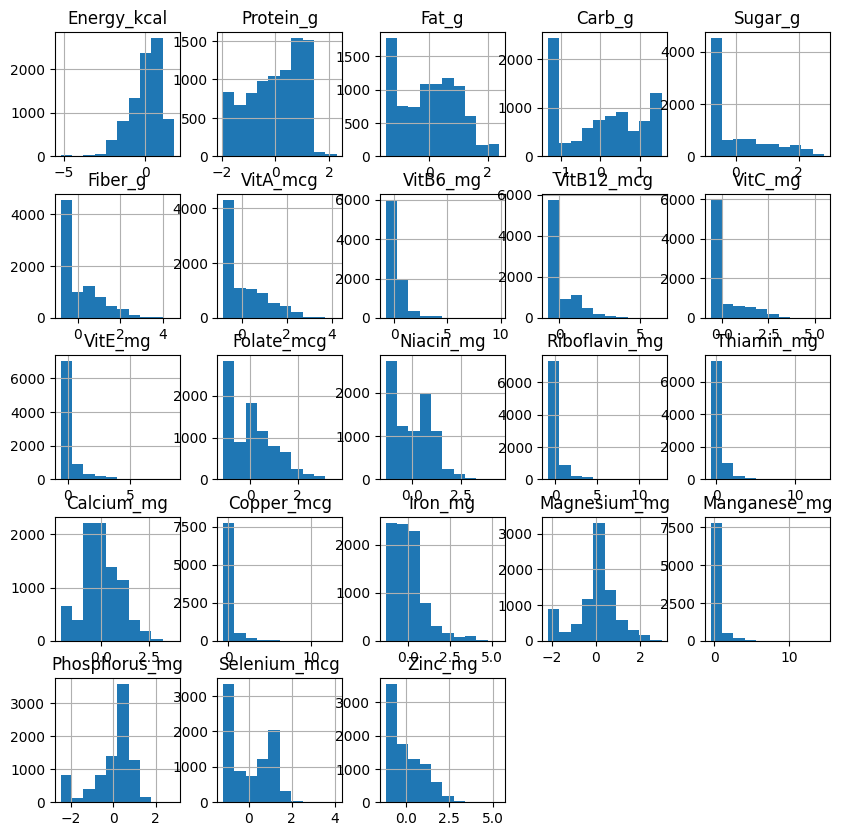

In [75]:
df_nutri.hist(figsize=(10,10))

### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [76]:
modelo_pca = PCA()
modelo_pca.fit(df_nutri)

PCA()

In [77]:
modelo_pca.components_

array([[ 1.98045037e-01,  2.77927414e-01,  1.48023630e-01,
         2.89780903e-03, -2.65499742e-02,  7.44287030e-02,
         7.99931465e-02,  2.63414232e-01,  2.15147624e-01,
        -2.41578310e-02,  8.06581235e-02,  1.95833995e-01,
         3.03454941e-01,  2.66735762e-01,  2.29400104e-01,
         1.54403008e-01,  1.88308882e-01,  2.81809108e-01,
         2.75670564e-01,  1.39020852e-01,  2.95597187e-01,
         2.47376233e-01,  2.98978117e-01],
       [ 5.43376081e-03, -2.42246049e-01, -1.50169742e-01,
         4.39120170e-01,  3.20254528e-01,  3.88059380e-01,
         1.09656229e-01,  7.44157690e-03, -2.36848125e-01,
         2.56138028e-01,  1.24465943e-01,  2.12485525e-01,
        -1.07131816e-01,  7.25659699e-02,  1.60925570e-01,
         2.04121098e-01,  1.36706989e-01,  1.24534002e-01,
         1.12674513e-01,  2.59182219e-01, -6.16379393e-02,
        -2.25185178e-01, -1.59529783e-01],
       [ 5.22265271e-01,  7.90226661e-02,  4.73911046e-01,
         2.10881292e-01,  1.8

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [78]:
df_compo=pd.DataFrame(modelo_pca.components_,columns=df_nutri.columns,index= [f"PC{i}" for i in range(len(df_nutri.columns))])
df_compo


,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC0,0.198045,0.277927,0.148024,0.002898,-0.026550,0.074429,0.079993,0.263414,0.215148,-0.024158,...,0.266736,0.229400,0.154403,0.188309,0.281809,0.275671,0.139021,0.295597,0.247376,0.298978
PC1,0.005434,-0.242246,-0.150170,0.439120,0.320255,0.388059,0.109656,0.007442,-0.236848,0.256138,...,0.072566,0.160926,0.204121,0.136707,0.124534,0.112675,0.259182,-0.061638,-0.225185,-0.159530
PC2,0.522265,0.079023,0.473911,0.210881,0.184202,0.136179,-0.292311,-0.159116,-0.185990,-0.394600,...,-0.096958,0.057955,-0.093723,-0.040051,0.039002,-0.073287,0.029160,-0.016400,-0.062524,-0.039190
PC3,0.064251,-0.132056,0.032874,0.038051,0.281229,-0.081251,0.086504,0.312399,0.232704,0.153351,...,0.352801,0.307120,-0.208702,-0.270591,0.124226,-0.319855,-0.327222,-0.230474,-0.164419,-0.026426
PC4,0.148431,-0.074988,0.335097,-0.094996,0.089666,-0.196324,0.544616,-0.071754,0.078367,0.127914,...,-0.046883,-0.220295,0.212893,0.008586,-0.181673,-0.044502,-0.074241,0.010867,0.095435,-0.052027
PC5,-0.056377,-0.130078,0.031900,-0.195738,-0.232627,0.056819,-0.220996,0.151959,0.055321,0.104925,...,-0.032598,-0.001320,-0.440449,0.404956,0.041904,-0.096259,0.353709,-0.273709,-0.079276,0.095311
PC6,0.056439,0.006583,0.061057,0.057248,0.124189,-0.158187,0.188459,-0.218884,0.294178,-0.082043,...,0.225303,-0.113935,0.111275,0.569171,0.176256,-0.217741,0.099441,-0.148707,-0.125677,0.076144
PC7,-0.006633,0.043613,-0.090748,-0.000223,0.484500,0.066867,-0.381964,0.084649,0.247129,0.302244,...,-0.196122,-0.395320,0.056744,0.055444,-0.003136,0.191494,-0.196760,0.103840,-0.009711,0.317642
PC8,-0.056684,0.127038,0.172536,-0.178933,-0.382132,0.168389,-0.041751,0.105078,-0.071421,0.227712,...,-0.029489,0.049271,0.489771,-0.135641,0.204857,-0.019208,0.041856,-0.019741,-0.397578,0.045342
PC9,0.295080,0.017928,0.318727,0.035122,-0.210174,-0.101103,-0.080107,-0.183531,-0.065568,0.639078,...,-0.088774,-0.001610,-0.233598,0.020123,0.103469,0.016090,-0.165279,0.021910,-0.085098,-0.002007


<Axes: >

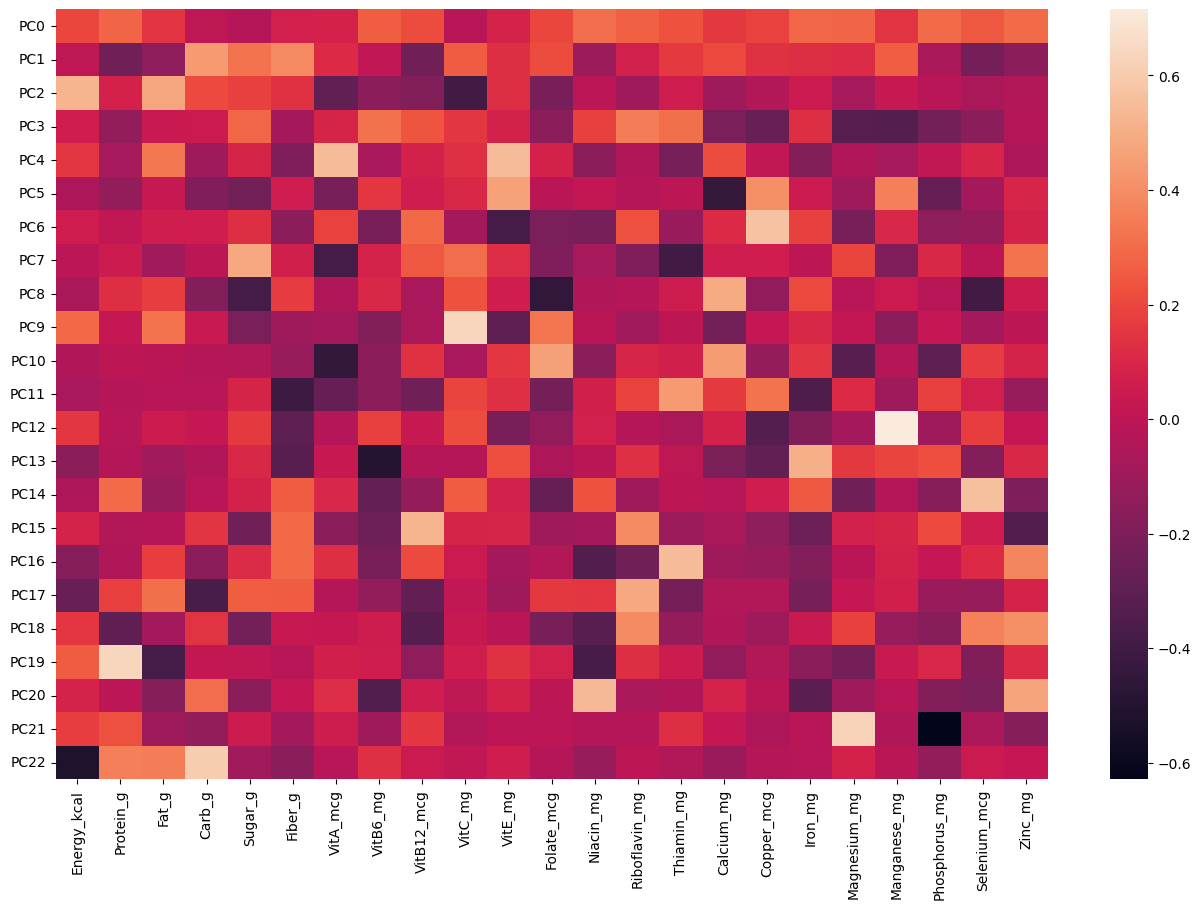

In [81]:
plt.figure(figsize=(16,10))
sns.heatmap(df_compo)

### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.3125111  0.16666503 0.08532219 0.07111741 0.05904531 0.04487789
 0.03079514 0.02718658 0.02537361 0.02262291 0.02194625 0.01905314
 0.01852623 0.01432524 0.01349698 0.01297861 0.01120283 0.00974457
 0.00929553 0.00746957 0.00693989 0.00566242 0.00384157]


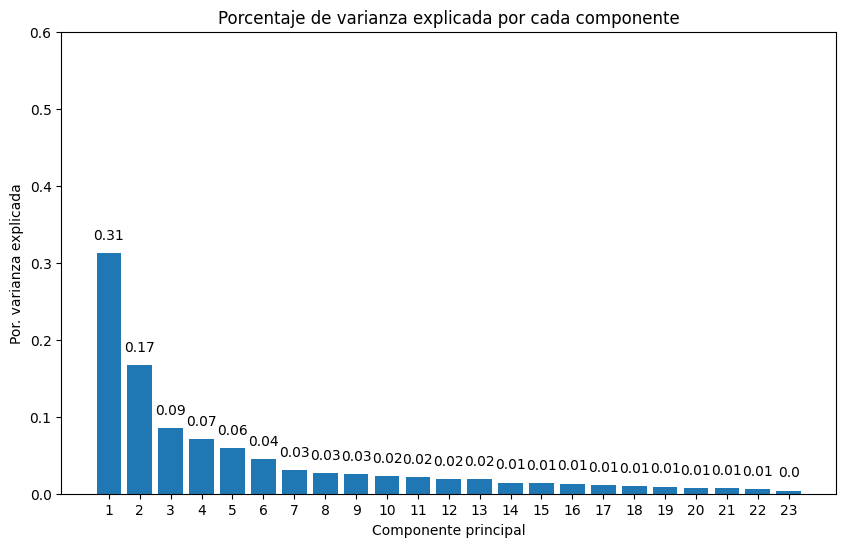

In [88]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_nutri.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.6)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.3125111  0.47917612 0.56449832 0.63561572 0.69466103 0.73953892
 0.77033406 0.79752064 0.82289426 0.84551716 0.86746341 0.88651656
 0.90504278 0.91936803 0.93286501 0.94584362 0.95704645 0.96679102
 0.97608654 0.98355611 0.99049601 0.99615843 1.        ]


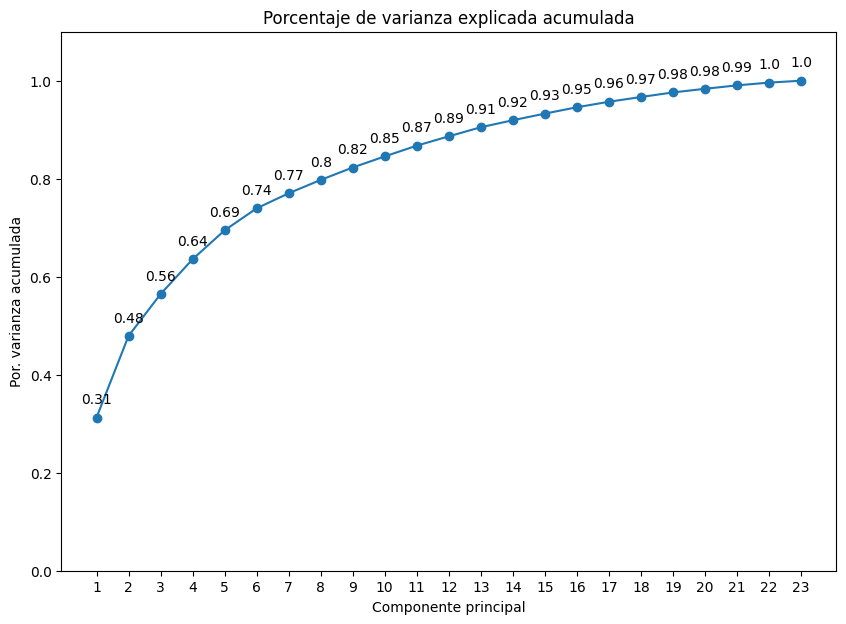

In [86]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.plot(
    np.arange(len(df_nutri.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_nutri.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [ ]:
#Me quedo con 6 componentes principales

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [89]:
nuevo_modelo= PCA(n_components=6)
nuevo_modelo.fit(df_nutri)

PCA(n_components=6)

In [91]:
proyecciones=nuevo_modelo.transform(df_nutri)
proyecciones

array([[-2.13903189, -0.96801891,  1.46398817,  0.27087202,  4.06699112,
         0.30722175],
       [-2.1064854 , -0.90950144,  1.48058025,  0.26323952,  4.03245901,
         0.34861302],
       [-3.26782972, -1.13842955,  2.04233529,  1.17542089,  4.07172205,
         1.32660728],
       ...,
       [-2.93052905,  1.66440526,  1.24206984,  1.17239624, -0.91555011,
        -0.88590161],
       [ 1.11889546, -0.78083408, -0.80512618, -1.58183793,  1.64170229,
         1.09000167],
       [ 0.37955124, -1.27668203, -1.59197004, -1.23582614,  0.71696545,
        -0.64332377]])

In [92]:
df_reducido=pd.DataFrame(proyecciones,df_nutri.index,[f"PC{i}" for i in range(1,7)])
df_reducido

,PC1,PC2,PC3,PC4,PC5,PC6
1001,-2.139032,-0.968019,1.463988,0.270872,4.066991,0.307222
1002,-2.106485,-0.909501,1.480580,0.263240,4.032459,0.348613
1003,-3.267830,-1.138430,2.042335,1.175421,4.071722,1.326607
1004,1.525964,-1.264102,-0.136013,-0.929808,2.430444,-2.095054
1005,1.240712,-1.204120,-0.004729,-1.192002,2.691725,-2.341876
...,...,...,...,...,...,...
83110,2.553661,-2.548700,-0.472185,-0.109428,2.716513,0.018570
90240,0.075018,-1.840922,-0.935725,-1.348908,-0.392092,-0.759672
90480,-2.930529,1.664405,1.242070,1.172396,-0.915550,-0.885902
90560,1.118895,-0.780834,-0.805126,-1.581838,1.641702,1.090002
